In [2]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from cycler import cycler
from pywaffle import Waffle
import numpy as np
%matplotlib inline 

In [3]:
# show me EVERYTHING!
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', 1000)

In [4]:
plt.rcdefaults()
plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'font.family': 'sans-serif',
    'font.sans-serif' : 'Tahoma',
    'axes.facecolor' : '#ffffff',
    'axes.axisbelow':True, 
    'axes.grid' : True,
    'grid.color' : '#bec0c2',
    'grid.linestyle' : 'dotted',
    'axes.spines.left'   : False,   
    'axes.spines.bottom' : False,
    'axes.spines.top'    : False,
    'axes.spines.right' : False,
    'axes.prop_cycle': cycler('color', ['#e81c61', '#ffb845', '#fc6b4a', '#f9f871', '#31517a', '#3f0092']),
    'xtick.bottom'  : False,
    'ytick.left': False,
    'figure.titlesize' : 'large', 
    'figure.titleweight' : 'bold',
    'figure.facecolor' : '#ffffff',
    'text.color' : '#595959',
    'axes.labelcolor' : '#595959',
    'xtick.color' : '#595959',
    'ytick.color' : '#595959',
    'legend.loc' : 'best',
    'legend.fancybox'    : True,
    'legend.frameon'     : True,
    'legend.edgecolor'     : '0.9',
    'legend.markerscale'   : '0.5',
    'lines.marker'      : None,
    'lines.markersize'  : 3,           
})

In [5]:
df = pd.read_csv('alphabay.csv', encoding = "utf-8")

In [6]:
df.dtypes

Date                        object 
Cannabis                    float64
Average Cannabis            float64
Cumulative Cannabis         float64
Ecstasy                     float64
Average Ecstasy             float64
Cumulative Ecstasy          float64
Stimulants                  float64
Average Stimulants          float64
Cumulative Stimulants       float64
Misc                        float64
Average Misc                float64
Cumulative Misc             float64
Psychedelics                float64
Average Psychedelics        float64
Cumulative Psychedelics     float64
Benzos                      float64
Average Benzos              float64
Cumulative Benzos           float64
Opioids                     float64
Average Opioids             float64
Cumulative Opioids          float64
Dissociatives               float64
Average Dissociatives       float64
Cumulative Dissociatives    float64
Digital Goods               float64
Average Digital Goods       float64
Cumulative Digital Goods    

In [7]:
df.tail()

,Date,Cannabis,Average Cannabis,Cumulative Cannabis,Ecstasy,Average Ecstasy,Cumulative Ecstasy,Stimulants,Average Stimulants,Cumulative Stimulants,Misc,Average Misc,Cumulative Misc,Psychedelics,Average Psychedelics,Cumulative Psychedelics,Benzos,Average Benzos,Cumulative Benzos,Opioids,Average Opioids,Cumulative Opioids,Dissociatives,Average Dissociatives,Cumulative Dissociatives,Digital Goods,Average Digital Goods,Cumulative Digital Goods,Prescription,Average Prescription,Cumulative Prescription,Other,Average Other,Cumulative Other
879,2017-05-22,166275.96,101070.35,72335795.39,75121.49,43010.17,24226252.11,107545.74,77911.74,49852518.93,12727.95,9627.29,2094520.37,21673.63,13071.33,11195475.24,50762.33,34527.32,18304591.45,41583.63,30915.25,19524229.50,12490.27,10167.68,5007268.81,27130.67,16041.97,11582237.37,13291.89,7311.59,4949890.71,15847.28,5872.66,3725865.90
880,2017-05-23,120220.66,83023.09,72456016.05,56616.82,37380.53,24282868.93,92077.86,66742.95,49944596.79,33408.09,9143.57,2127928.46,16045.80,11105.32,11211521.04,44927.68,29919.51,18349519.13,37445.48,24312.65,19561674.98,26128.78,8681.14,5033397.59,16897.26,12887.85,11599134.63,6775.55,6239.88,4956666.26,6982.60,5250.66,3732848.50
881,2017-05-24,78385.39,71176.41,72534401.44,52741.76,32239.23,24335610.69,86728.41,57254.67,50031325.20,1462.84,8927.10,2129391.30,11759.30,9351.65,11223280.34,31103.46,24911.74,18380622.59,20827.74,20958.86,19582502.72,4489.35,7808.14,5037886.94,10726.05,10922.58,11609860.68,4372.00,4741.92,4961038.26,2802.70,4542.39,3735651.20
882,2017-05-25,11731.57,53801.94,72546133.01,5679.36,27165.63,24341290.05,6801.25,41927.43,50038126.45,1725.10,7051.28,2131116.40,677.55,7165.18,11223957.89,4618.94,18773.20,18385241.53,4217.49,14867.76,19586720.21,608.93,6245.33,5038495.87,3046.73,8364.39,11612907.41,610.37,3578.54,4961648.63,1091.83,3817.77,3736743.03
883,2017-05-26,0.00,30048.23,72546133.01,0.00,16433.99,24341290.05,338.75,26563.75,50038465.20,34.95,5233.00,2131151.35,0.00,4068.95,11223957.89,0.00,11521.44,18385241.53,0.00,8927.24,19586720.21,0.00,4461.01,5038495.87,750.00,4488.58,11613657.41,0.00,1679.70,4961648.63,0.00,1553.88,3736743.03


In [8]:
# create a dataframe with all the cumulative sale totals for each drug
# take the cumulative # for each drug from the last row of the original df

cumulativedrugs = {'Drug': ['Cannabis', 'Ecstasy', 'Stimulants', 'Misc', 'Psychedelics', 'Benzos', 'Opioids', 'Dissociatives', 'Digital Goods', 'Prescription', 'Other'], 
                   'CumulativeSales': [72546133.01, 24341290.05, 50038465.20, 2131151.35, 11223957.89, 18385241.53, 19586720.21, 5038495.87, 11613657.41, 4961648.63, 3736743.03]}
sales_df = pd.DataFrame(data=cumulativedrugs)

In [9]:
sales_df.set_index('Drug', inplace=True)

In [10]:
sales_df_sorted = sales_df.sort_values(by='CumulativeSales', ascending=False)
sales_df_sorted

,CumulativeSales
Drug,
Cannabis,72546133.01
Stimulants,50038465.20
Ecstasy,24341290.05
Opioids,19586720.21
Benzos,18385241.53
Digital Goods,11613657.41
Psychedelics,11223957.89
Dissociatives,5038495.87
Prescription,4961648.63


In [11]:
sum(sales_df.CumulativeSales)

223603504.18

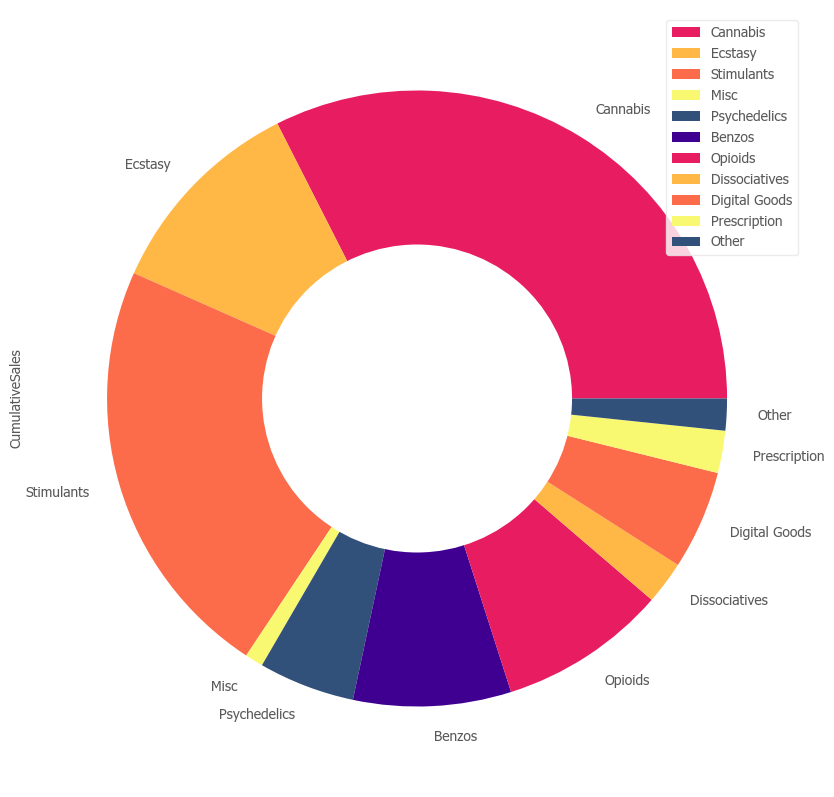

In [12]:
ax = sales_df.plot(y='CumulativeSales', kind='pie', figsize=(10,10))
centercircle = plt.Circle((0,0),0.5, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centercircle)
plt.savefig("alphabay_sales2.pdf")
plt.show()

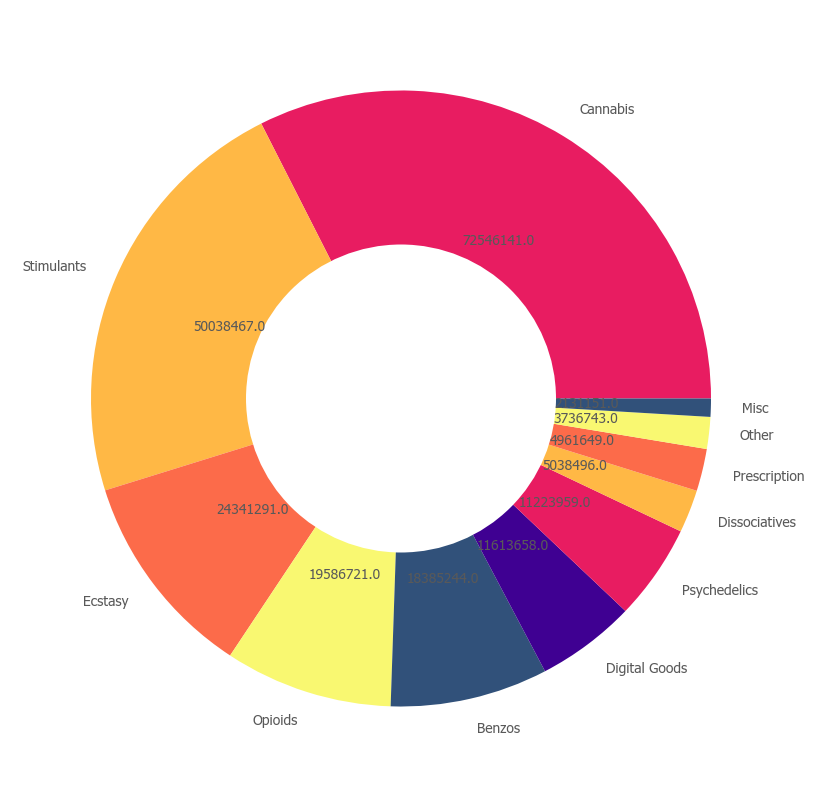

In [13]:
def absolute_value(val):
    a  = np.round(val/100.*sales_df.CumulativeSales.sum(), 0)
    return a

ax = plt.pie(sales_df_sorted.CumulativeSales, labels=sales_df_sorted.index, autopct=absolute_value)
fig = plt.gcf()
centercircle = plt.Circle((0,0),0.5, fc='white')
fig.gca().add_artist(centercircle)
fig.set_size_inches(10,10)
plt.savefig("alphabay_sales.pdf")
plt.show()

In [15]:
sales_df

,CumulativeSales
Drug,
Cannabis,72546133.01
Ecstasy,24341290.05
Stimulants,50038465.20
Misc,2131151.35
Psychedelics,11223957.89
Benzos,18385241.53
Opioids,19586720.21
Dissociatives,5038495.87
Digital Goods,11613657.41


In [16]:
# Alphabay drug sales
72546133.01 + 24341290.05 + 50038465.20 + 11223957.89 + 18385241.53 + 19586720.21 + 5038495.87 + 4961648.63

206121952.39

In [17]:
# all 3 market (alphabay, evolution, silk road 2) drug sales
206121952.39+ 37341609.300000004 + 85956899.36

329420461.05

In [18]:
# all 3 market cannabis
72546133.01 + 11841017.14 + 21415281.11

105802431.26

In [19]:
# all 3 markets Ecstasy
24341290.05 + 7749858.20 + 23341340.86

55432489.11

In [20]:
# all 3 markets Stimulants
50038465.20 + 10334324.74 + 22709668.16

83082458.10000001

In [21]:
# all 3 markets Opioids
19586720.21 + 3511100.03 + 4390563.18

27488383.42

In [22]:
# all 3 markets benzos
18385241.53 + 1280220.70 + 3693482.65

23358944.88

In [23]:
# all 3 markets psychedelics
11223957.89 + 1605515.87 + 6809858.22

19639331.98

In [24]:
# all 3 markets dissociatives
5038495.87 + 492324.35 + 2263269.69

7794089.91

In [25]:
# all 3 markets prescription
4961648.63 + 527248.27 + 1333435.49

6822332.390000001

In [26]:
# all 3 markets digital goods
11613657.41 + 5330729.00 + 3694247.83

20638634.240000002

In [27]:
# all 3 markets misc
2131151.35 + 802330.14 + 765939.49

3699420.9800000004

In [28]:
# all 3 markets other
3736743.03 + 519358.19 + 1626906.04

5883007.26

In [29]:
# non-drug total for all 3 markets
20638634.240000002 + 3699420.9800000004 + 5883007.26

30221062.480000004